# Deep Neural Network

**목차**

> 1. 문제 정의하기
> 2. 알고리즘 이해하기
> 3. 준비하기 
> 4. 데이터 전처리
> 5. 알고리즘 적용하기
> 6. 결과 해석하기

## 1. 문제 정의하기

머신러닝 기술 중에 딥러닝 기술을 이용한 이미지 판독 기술이 있습니다.  
딥러닝 모델 중에서도 가장 기본적인 `Deep Neural Network(DNN)` 모델을 통해 이 기술을 구현해보겠습니다.  
데이터셋은 의류 데이터셋을 이용하여 이미지를 판독하는 딥러닝 모델을 어떻게 만들 수 있는지 살펴보겠습니다.  
이 데이터셋은 흔히 `Fashion MNIST` 라고 불리는 데이터셋인데, 앞서 배운 텐서플로우의 `Keras` 라이브러리에 내장되어 있습니다.  

그럼, `Keras`에 내장되어있는 `Fashion MNIST` 데이터셋을 불러와서, '이미지를 인식하여 분류해내는 딥러닝 모델'에 대해서 학습해보도록 하겠습니다.

## 2. 알고리즘 이해하기
Keras를 활용한 Fashion MNIST 딥러닝 모델을 만들기전에, 딥러닝 모델 중에서도 DNN 모델을 구현하는데 도움이 될 핵심적인 개념들에 대해 먼저 이해하고 넘어가겠습니다.

### (1) 활성화함수(Activation Function)

저희는 Deep Learning Overview 강의에서 활성화 함수 개념을 간단히 다뤘습니다. 그렇다면 활성화함수 개념에 대해 복습을하고 DNN 모델을 만들 때 사용하는 활성화 함수의 개념에 대해 설명하겠습니다.<br>

활성화 함수란 입력 신호의 총합인 `z`를 받아 출력신호 `y`로 변환하는 함수`h`입니다. 입력 받은 신호를 얼마만큼의 강도로 출력할지, 그 값의 활성화(activation) 여부를 어떻게 판단할지 결정하는 역할을 합니다. 
<br><br>
$
z = w_0 + w_1x_1 + w_2x_2 \\
y = h(z) \\
$

다음 수식에서 $x_1$, $x_2$라는 두 입력 신호를 각각의 weight과 곱한 다음 입력 신호의 총합인 $z$를 출력합니다. 
입력 신호의 총합인 $z$를 활성화함수 $h(z)$에 넣어 y라는 출력 신호를 만들 수 있습니다.<br>

심층 신경망에서는 각 층마다 활성화 함수를 거친 값이 다음 층의 입력값이 됩니다. 이때 심층 신경망, 즉 신경망을 여러 층으로 쌓는 것이 유의미하려면, 신경망을 통해 비선형성을 표현할 수 있어야 합니다. 따라서 딥러닝 모델에서는 반드시 선형 함수가 아닌 비선형 함수를 활성화 함수로 사용하여야 합니다. 

대표적인 활성화 함수 두 가지를 알아봅시다. 

#### A. 렐루(ReLU)

렐루 함수는 출력값이 양수일 때 자기 자신을 반환하고 출력값이 음수일때 0으로 출력하는 활성화함수입니다. 출력값의 범위가 정해져있지 않기 때문에 출력값의 범위가 넓어 기울기 소실 문제가 발생하지 않습니다. 특히 신경망의 구조에서 중간 노드들인 은닉층(Hidden Layer)에서 주로 활용됩니다.<br>
렐루 함수를 수식으로 표현하면 아래와 같습니다.<br><br>
$$
RELU(z) = \begin{cases}
z & \mbox{if } z\ge0 \\ 
0 & \mbox{if } z\lt0 \\ 
\end{cases}
$$
<!-- ![image.png](attachment:image.png) -->


#### B. 소프트맥스(Softmax)
소프트맥스 함수는 K개의 값이 존재할 때 각각의 값의 편차를 확대시켜 큰 값은 상대적으로 더 크게, 작은 값은 상대적으로 더 작게 만든 다음에 정규화 시키는 함수입니다. 신경망의 구조에서 마지막 노드인 출력층(Output Layer)에서 주로 활용됩니다. 소프트맥스는 입력받은 값을 0에서 1사이의 확률 값으로 변환하여 출력하며, 출력 값들의 총합은 항상 1이 되는 특성이 있습니다. 소프트맥스를 2개 이상의 클래스를 분류하는 문제에서 마지막 출력층에서 사용하면, 가장 확률이 높은 클래스로 입력값을 분류하게 됩니다. 
<br>

$$
Softmax(\vec{z})_{i}=\frac{\exp \left(z_{i}\right)}{\sum_{k=1}^{n} \exp \left(z_{k}\right)}
$$


### (2) 최적화함수(optimizer)
신경망 학습의 목적은 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것입니다. 최적화(optimization)란 매개변수의 최적값을 찾는 문제를 푸는 것입니다.
예를 들어 입력값 $x$, 함수의 파라미터 $w$, 함수의 결과 $f(x; w)$일때, 함수 $f$의 결과 $f(x; w)$를 더 최적화된 방향으로 파라미터 $w$를 찾아서 파라미터를 갱신하는 방법입니다.

#### A. 경사하강법 (Gradient Descent)
대표적인 최적화 함수로는 `경사하강법(Gradient Descent; 그래디언트 디센트)`이 있습니다. 앞서 Linear Regression에서도 배웠었습니다. 기울기를 뜻하는 gradient를 이용해 x의 값을 어디로 옮겼을 때 함수가 최소값을 찾는지 알아보는 방법입니다.

<br>
$
\boldsymbol{Y}=w \boldsymbol{X}+b
$
<br>
위 식에서 파라미터를 갱신할 때 손실(Loss)이 줄어드는 최적화된 방향으로 $w$,$b$ 값을 수정합니다. 

$w := w - \gamma \frac{\partial Loss}{\partial w}$
<br><br>

아래 그래프에서는 Mean Squared Error(MSE)를 손실 함수로 지정했을 때, 이 손실(Loss)을 최소화하는 지점의 매개변수 a값을 target value로 지정했습니다. 
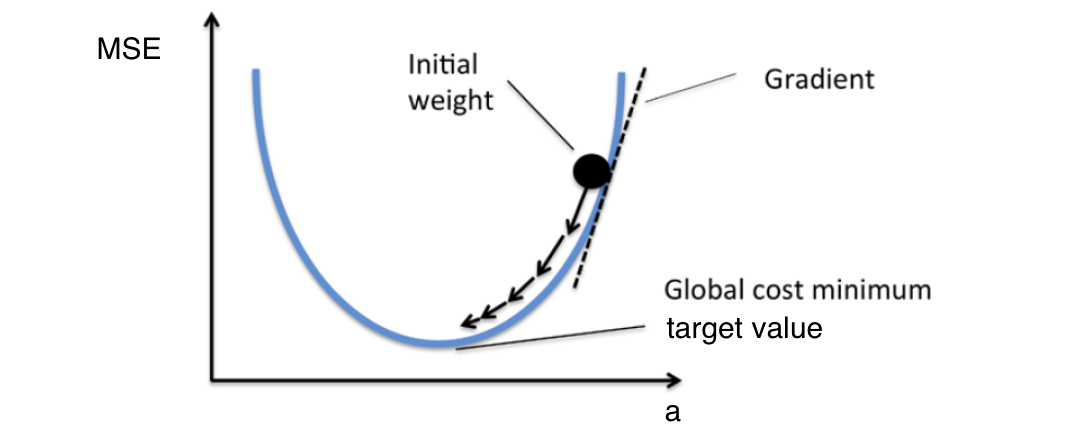

위 그래프에서 a는 앞서 언급한 매개변수 w와 같은 의미입니다. 최적의 매개변수 값을 구하기 위해 매개변수의 기울기인 미분을 통해 매개변수 값을 지속적으로 갱신하면서 최적의 값인 target value에 도달해야 합니다. 접선의 기울기가 양수일 때, 파라미터를 음의 방향으로 업데이트하여 목표하는 target value값과 가까워질 때까지 지속적으로 업데이트합니다. 이 방식을 경사하강법이라고 합니다. 



#### B. Adam(Adaptive Moment Estimation)
Adam은 경사하강법에서 발전한 최적화 함수(optimizer)입니다. 과거의 gradient 변화량을 참고해서 다음 gradient에 적용하는 것이 특징입니다. Adam은 Momentum optimizer 알고리즘과 RMSProp optimizer 알고리즘을 합한 개념입니다. 각각에 대해 살펴봅시다.  Momentum optimizer 방식은 Loss 함수의 최솟값을 향해 이동하는 방향과는 별개로, 과거에 이동했던 방식을 현재 gradient를 통해 기억하면서 그 방향으로 일정 정도를 추가적으로 이동합니다. 한편, RMSProp은 과거의 모든 gradient 정보를 균일하게 사용하는 것이 아니라, 과거의 gradient는 천천히 잊고 최신의 gradient를 크게 반영하는 방식입니다. 그러므로 Adam은 이 두가지를 합친 개념이라고 생각하시면 됩니다. 저희가 실습할 Fashion MNIST 딥러닝 모델에서는 Adam을 활용할 것입니다.

### (3) Loss Function 

#### Cross Entropy Error

Mean Squared Error(MSE)보다 딥러닝에서 많이 사용되는 손실 함수는 Cross Entropy Error입니다. Cross Entropy는 예측 분포인 $p(x)$를 통해 실제 값의 분포인 $q(x)$를 예측하는 함수입니다. <br>
$$
H_{p}(q)=-\sum_{i=1}^{n} q\left(x_{i}\right) \log p\left(x_{i}\right)
$$
<br> 

Cross Entropy 수식을 딥러닝 모델에서 손실 함수로 사용할 때 어떤 의미인지 살펴봅시다. 다음 Cross Entropy Error 수식에 실제값과 예측값을 대입해봅시다. 실제 값($y_{true}$)이 1일 때 그 예측값($y_{pred}$)의 로그값만 남게 되는 것을 알 수 있습니다. 즉, Cross Entropy Error는 정답일때의 출력이 전체 값을 정하게 됩니다. 로그 함수의 특성상, 정답일 때의 출력이 작아질수록 Cross Entropy 값, 즉 오차는 커지는 것이죠.  

$$
E=-\sum_{i=1}^{n} y_{true}\log y_{pred}
$$
<br> 


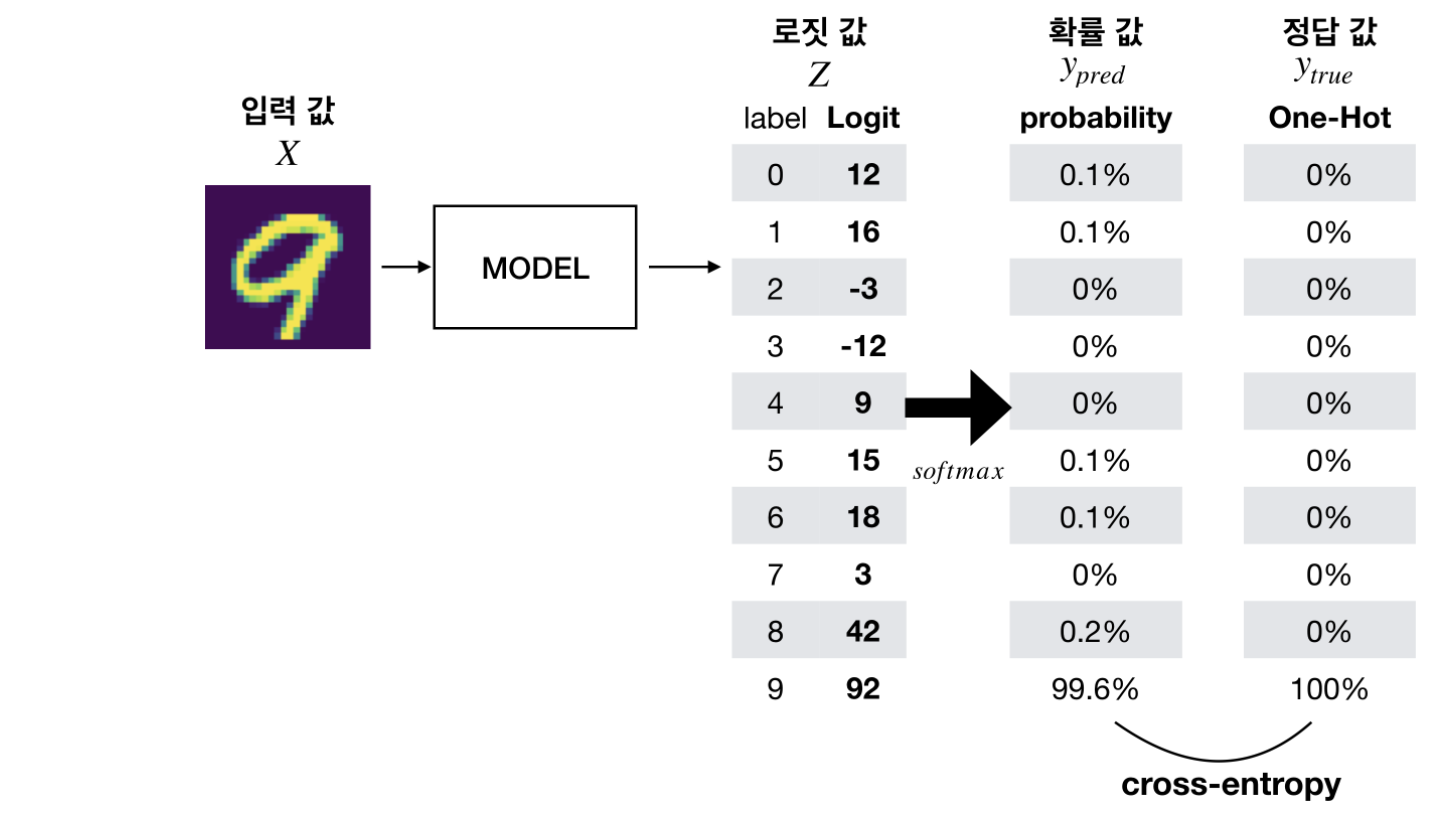

### (4) epochs, batch size
머신 러닝에서 최적화(optimization)를 할 때는 일반적으로 여러 번 학습 과정을 거칩니다. 또한, 한 번의 학습 과정 역시 사용하는 데이터를 나누는 방식으로 세분화 시킵니다. 왜냐하면 다루어야 할 데이터가 너무 많아 메모리가 부족하기도 하고 한 번의 계산으로 최적화된 값을 찾는 것이 힘들기 때문입니다. 
<br>
그래서 `epoch, batch_size` 라는 개념을 이해하고 모델을 학습시키겠습니다.
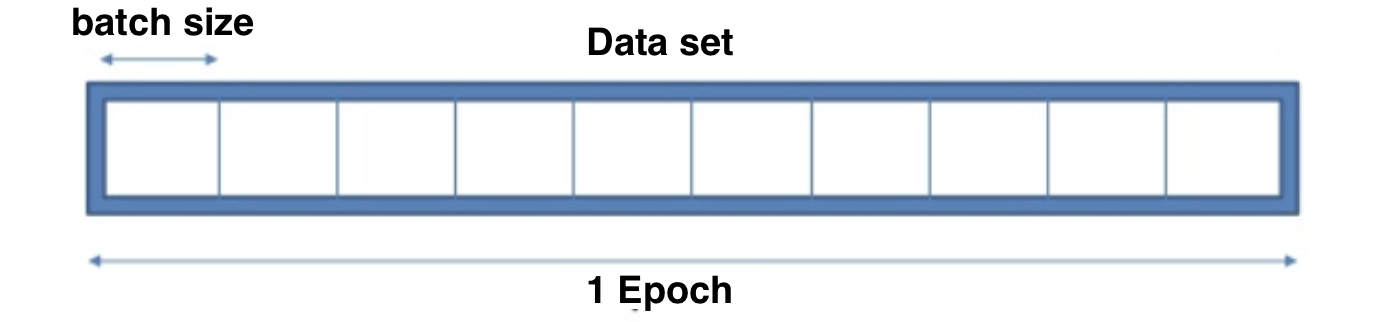
#### A. epochs
1 epoch은 모든 데이터 셋을 한 번에 학습시키는 것을 의미합니다. 즉 모델 학습을 1 epoch 했다는 것은 전체 데이터 셋에 대해 한 번 학습을 완료한 상태입니다.

#### B. batch_size
메모리의 한계와 속도 저하 때문에 대부분의 경우에 한 번의 epoch에서 모든 데이터를 한꺼번에 집어넣을 수 없습니다. 그래서 데이터를 나누어서 학습시키게 되는데 이때 나누어진 데이터 사이즈를 batch size라고 합니다. 즉 데이터 셋을 batch size 크기로 나누어서 학습합니다.


## 3. 준비하기

앞에서 배운 Deep Learning과 텐서플로우 개념을 활용해서 딥러닝 모델을 만들어 보겠습니다. keras에 Fashion MNIST 데이터를 이용하여 간단한 Multi layer Perceptron(MLP) 모델을 구성해 보도록 하겠습니다.
### (1) 패키지 불러오기

In [ ]:
%matplotlib inline

import os
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

네트워크를 훈련하는데 60,000개의 fashion mnist 이미지를 사용하고, 훈련된 네트워크가 이미지를 잘 분류하는지 확인하기 위해 10,000개의 이미지로 평가하겠습니다. 패션 MNIST 데이터셋은 텐서플로에서 바로 임포트하여 가져올 수 있습니다.

### (2) 데이터 불러오기
keras.datasets.fashion_mnist를 불러와 load_data() 함수를 호출하면 train_images, train_labels, test_images, test_labels 네 개의 NumPy 배열이 반환됩니다.

In [ ]:
# fashion mnist 가져오기
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images와 train_labels 배열은 모델을 학습할 때 사용되는 훈련용 데이터셋이며, test_images와 test_labels 배열은 훈련을 통해 저희가 만들 모델 성능 테스트에 사용되는 테스트 데이터 셋입니다.
<br>
60000개의 fashion MNIST data 중 각각의 이미지 크기는 28x28 이기 때문에, train_image에서 첫 번째 이미지만 가져와 크기를 살펴 보면 아래와 같은 형태를 가지는 것을 알 수 있습니다.

In [ ]:
train_images[0].shape

이미지 크기는 픽셀 단위로 이루어져있는데 fashion mnist 픽셀 값은 0과 255 사이입니다.

In [ ]:
train_images.min(), train_images.max()

레이블(label), 즉 각 이미지가 무엇인지 나타내는 정답은 10가지로, 0에서 9까지의 정수 배열로 표현됩니다.

In [ ]:
set(train_labels)

각 값은 아래의 클래스를 의미합니다.

| 레이블 | 클래스 |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

각 이미지는 하나의 레이블에 매핑되어 있습니다. 데이터셋에 클래스 이름 문자열로 들어있지 않기 때문에, 나중에 이미지를 출력할 때 참고하기 위해 표를 참고해서 별도의 변수를 만들어 저장합니다.

In [ ]:
# class name 지정해주기
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### (3) 데이터 파악하기
정리하면, 앞서 가져온 train_images는 아래와 같이 구성되어 있습니다.

In [ ]:
print("훈련 set의 shape : ", train_images.shape)
print("훈련 set의 label : ", set(train_labels))
print("테스트 set의 shape : ", test_images.shape)

이렇게 숫자로만 이루어진 배열이 정말 이미지로 표현이 될까요? 각 이미지의 레이블은 정확한 걸까요? 라는 의문이 생길 것입니다. 그렇다면 60000개 중 50개의 이미지를 직접 확인해보겠습니다.

In [ ]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols*1.4, n_rows*2.0))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(train_images[index], interpolation="nearest", cmap="binary")
        plt.axis('off')
        plt.title(class_names[train_labels[index]])
plt.show()

적절한 데이터를 가져왔고 레이블이 잘 되어있는 것을 확인할 수 있습니다. 그렇다면 이제 본격적으로 분류 모델을 만들어봅시다.

## 4. 데이터 전처리
네트워크를 훈련하기 전에 분류 모델에 맞게 데이터를 가공하는 작업인 전처리를 해야 합니다. 먼저 첫 번째 이미지를 보고 어떤 전처리가 필요한지 살펴봅시다. 

### (1) 데이터 정규화하기
훈련 세트 즉 train_images에 있는 첫 번째 이미지를 확인하겠습니다. 아래의 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있습니다.

In [ ]:
plt.figure()
plt.imshow(train_images[0], cmap="binary")
plt.colorbar()
plt.show()

train image와 test image의 값을 0 에서 1 사이로 조정하기 위해 255로 나누어 줍니다.

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### (2) One-hot 인코딩하기

1. 각 단어에 고유한 인덱스를 부여합니다.
2. 표현하고 싶은 단어의 인덱스 위치에 1을 부여하고, 다른 단어의 인덱스 위치에는 0을 부여합니다.

| 레이블 | 클래스 |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

예를 들어, 레이블 `4`의 `Coat` 클래스를 [0,0,0,0,1,0,0,0,0,0]과 같이 표현하는 것입니다. 이 과정을 keras에서는 아래와 같이 쉽게 구현할 수 있습니다.

In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels_first_10 = train_labels[:10]
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

train_labels_first_10은 원핫인코딩을 하지 않은 이미지 레이블로 첫 10개의 이미지의 레이블은 아래와 같습니다.

In [ ]:
train_labels_first_10

위와 같았던 레이블이 0에서 1사이 값으로 만드는 웟핫인코딩 방식을 활용하면 아래와 같이 변환됩니다.

In [ ]:
train_labels[:10]

## 5. 알고리즘 적용하기
이제 기본적인 데이터 전처리는 끝났습니다. 딥러닝 모델을 구성하기전에 딥러닝 모델에서 사용될 개념들에 대해 정리하고 넘어가겠습니다.

### (1) Fashion MNIST 모델 구성하기
+ 데이터를 입력받는 `Input(Shape, name= )` 레이어
+ 다수의 유닛으로 구성된 `Dense(units, activation=None, name= )` 레이어
+ 정의된 입력과 출력으로 모델을 생성하는 `Model(inputs, output, name= )` 클래스

#### [Step 1] 입력층 구성하기
먼저, 입력층을 구성하겠습니다. 입력층에서 각 이미지의 크기는 28 * 28이므로 일단 `shape=(28, 28)`로 설정합니다.

In [ ]:
from tensorflow.keras.layers import Input

inputs = Input(shape=(28,28), name="images")
inputs

원본 데이터에서 각 이미지는 28 * 28 형태의 행렬로 표현되지만, 모델을 학습시키기 위해서는 각 이미지 행렬을 하나의 벡터로 변환해야 합니다. 행렬을 벡터로 표현하기 위해선 28 * 28로 shape 모양을 바꿔주는 `Reshape()`를 사용하거나 혹은 자동으로 28 * 28을 수행하는 `Flatten()`을 사용합니다.

In [ ]:
# 방법1. layers의 Reshape 이용하기
from tensorflow.keras.layers import Reshape

reshaped = Reshape((28*28, ))(inputs)
reshaped

In [ ]:
# 방법2. layers의 Flatten 이용하기
from tensorflow.keras.layers import Flatten

flatten = Flatten()(inputs)
flatten

#### [Step 2] 은닉층 구성하기

이제 입력층이 완성되었으니 은닉층을 구성해봅시다. 은닉층은 2개로 구성해보겠습니다. 첫번째 은닉층 `dense1`은 입력층에서 넘어온 `reshape` 데이터를 받으며, 128개의 유닛으로 구성됩니다. 활성화 함수로는 `relu` 함수를 쓰겠습니다. 두번째 은닉층 `dense2`에서는 첫번째 은닉층에서 넘어온 `dense1` 데이터를 받으며, 마찬가지로 유닛은 128개, 활성화 함수는 `relu` 함수를 쓰겠습니다.

In [ ]:
from tensorflow.keras.layers import Dense

dense1 = Dense(128, activation='relu')(reshaped)
dense2 = Dense(128, activation='relu')(dense1)

#### [Step 3] 출력층 구성하기
끝으로 출력층을 구성해보겠습니다. 출력층에 분류할 클래스 개수만큼 유닛을 구성하기 위해 출력층 유닛을 10개로 구성하고 활성화 함수로는 `softmax`를 설정하겠습니다.

In [ ]:
outputs = Dense(10, activation='softmax')(dense2)

**왜 softmax를 마지막 출력층의 활성화 함수로 설정했을까요?**
<br>
모델로부터 반환받고 싶은 값이 "이미지가 각 클래스일 확률"이기 때문입니다.
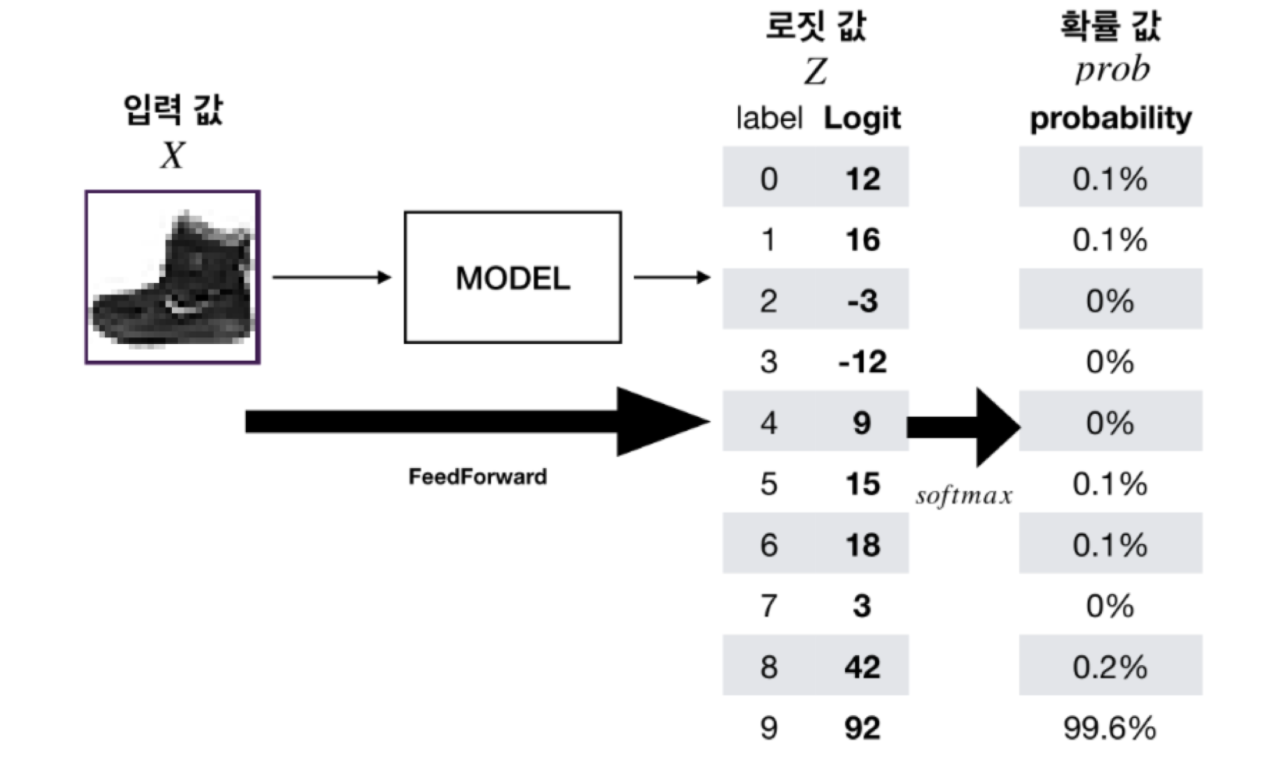

#### [Step 4] 모델 구성하기
이제 앞서 만든 레이어를 합쳐 모델을 만들겠습니다. model.summary()를 했을 때 나타나는 표에서 Param #에 값이 있는 층은 총 3개(은닉층 2개와 출력층 1개)이므로 3층 신경망 모델입니다.

In [ ]:
from tensorflow.keras.models import Model
model = Model(inputs, outputs, name='model')
model.summary()

### (2) Fashion MNIST 모델 학습하기
#### [Step 1] 최적화함수 결정하기

이제 이렇게 만든 모델로 여러번 예측값을 내보면서 오차를 줄이는 방향으로 훈련을 시켜나갈 것입니다. 텐서플로우에서 사용할 수 있는 최적화함수(optimizer) 종류로는 `SGD`, `RMSprop`, `Adam` 등이 있는데, 이번에는 `Adam`을 사용하겠습니다.

In [ ]:
from tensorflow.keras.optimizers import Adam
optim = Adam(learning_rate = 1e-3, beta_1=0.9, beta_2 = 0.999)

#### [Step 2] 손실함수 결정하기
손실함수로는 `cross-entropy`를 사용하겠습니다.

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy
loss_func = CategoricalCrossentropy()

#### [Step 3] 모델 컴파일하기
이제 이렇게 만들어진 모델을 컴파일해보겠습니다. 모델을 컴파일하는 것은 모델을 학습시키기 이전에 학습할 방식에 대한 환경설정을 하는 것입니다.
<br>
앞서 설정한 옵티마이저 `optim`과 손실함수 `loss_func`을 파라미터로 넣습니다. 끝으로 가장 확률이 높은 2개의 클래스만 반환하라는 의미에서 `metric` `TopKCategoricalAccuracy(k=2)`로 설정합니다.

In [ ]:
from tensorflow.keras.metrics import TopKCategoricalAccuracy
top_2 = TopKCategoricalAccuracy(k=2)
model.compile(optimizer=optim, 
              loss=loss_func, 
              metrics=[top_2])

#### [Step 4] 모델 학습시키기
훈련할 이미지에 대한 정답값을 모델에 학습시키기 위해 앞서 배운 batch_size와 epochs 개념을 적용시켜 메모리를 효율적으로 사용하면서 모델을 학습해 보겠습니다.

In [ ]:
hist = model.fit(train_images, train_labels, batch_size=64, validation_split=0.1, epochs=10)

Epoch가 1씩 증가할 때마다 val loss가 낮아지면서 오차가 줄어드는 것을 확인할 수 있습니다. 동시에 가장 확률이 높은 2개의 클래스를 나타내는 top k categorical accuracy가 높아지면서 학습이 진행되면서 정확도가 높아지는것을 확인할 수 있습니다. 

#### [Step 5] 모델 평가하기
훈련이 끝난 모델에 테스트용으로 분리해놓은 테스트용 이미지와 레이블을 넣어 정확도를 평가합니다. 모델의 정확도가 96.92%로 평가되었습니다.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print('테스트 정확도:', test_acc)

## 6. 결과 해석하기
### (1) Model Summary
이번 학습에서는 DNN에 대한 개념과 Fashion MNIST 데이터를 활용하여 모델에 직접 학습시키는 방법에 대해 알아보았습니다. 
Fashio MNIST 데이터를 불러올 때, 훈련용 데이터셋은 train_images와 train_labels 배열로 불러오고 모델 성능 테스트를 위한 테스트 데이터 셋은 test_images와 test_labels 배열로 데이터를 불러옵니다. 
이미지 출력할 때 레이블이 알맞게 저장되어있는지 알아보기 위해 클래스 이름을 문자열로 저장해주었습니다. 그다음 데이터 전처리를 통해 네트워크를 훈련하기 전에 분류 모델에 맞게 데이터를 가공했습니다. 딥러닝 모델을 만들기 위해 입력층, 은닉층, 출력층 순으로 구성했고 은닉층에는 relu 활성화 함수, 출력층에는 softmax 활성화 함수를 설정했습니다.
모델을 학습하기 위해서 Adam 옵티마이저를 사용했고 손실함수는 cross-entropy로 설정해서 batch size를 64개씩 총 10 epochs로 학습했습니다. 그 결과 96%의 정확도가 나오는 모델을 개발했습니다. 

96%의 정확도가 나왔으니 모델이 얼마나 학습이 잘 되어서 예측을 정확하게 하는지 확인해보겠습니다.
test를 위한 test_images에서 이미지 하나에 대한 예측이 정확한지 수치와 그래프로 표현해보겠습니다.  

In [ ]:
predictions = model.predict(test_images)
print(predictions[0])
print([round(p, 4) for p in predictions[0]])

위 출력값을 통해 test_images의 0번째 이미지에 대한 10개 클래스의 예측값을 확인했습니다. 그렇다면 가장 높은 신뢰도를 가진 레이블을 출력해보겠습니다.

In [ ]:
print(np.argmax(predictions[0]))

모델은 이 이미지가 class_name[9]인 앵클 부츠라고 가장 확신하고 있습니다. 이 값이 맞는지 테스트 레이블을 확인해 보겠습니다.

In [ ]:
test_labels[0]

모두 9번째 class_name인 앵클 부츠를 가리키는 것을 확인할 수 있었습니다. 그렇다면 0번째 원소인 앵클부츠의 이미지와 예측, 신뢰도 점수를 시각적으로 확인하기 위해 matplotlib 라는 라이브러리를 활용하겠습니다. **`plot_image`** 함수는 test할 이미지 사진과 test 이미지에 대해서 예측한 라벨의 클래스 이름, 정답인 라벨의 클래스, 그리고 신뢰도 점수를 나타내기 위해 만든 함수입니다. 
**`plot_value_array`**함수는 test 이미지의 신뢰도 점수를 반영한 그래프를 시각적으로 나타내기 위한 역할을 하도록 만들었습니다.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    
    # 예측 결과가 같으면 파란색으로, 예측결과가 틀리면 빨간색으로 나타냅니다.
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, np.argmax(test_labels,axis=1), test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  np.argmax(test_labels,axis=1))
plt.xticks(range(10), class_names, rotation = 60)
plt.xticks(fontsize = 10)
plt.show()

모델은 0번째 원소가 100%의 확률로 앵클부츠라는 것을 예측하였고 test label과 비교했을 때 일치하다는 것을 알 수 있었습니다. <br>
그렇다면 이번에는 여러개의 이미지에 대한 예측을 출력해보겠습니다.

In [ ]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5 
num_cols = 3 
num_images = num_rows * num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))

for i in range(num_images): #15개 
    # 1번째, 3번째, 5번째 column에 test_image 출력
    plt.subplot(num_rows, 2*num_cols, 2*i+1) 
    plot_image(i, predictions, np.argmax(test_labels, axis=1), test_images) 
    # 2번째, 4번째 6번째 column에 신뢰도 점수 출력
    plt.subplot(num_rows, 2*num_cols, 2*i+2) 
    plot_value_array(i, predictions, np.argmax(test_labels, axis=1)) 
plt.show()


그렇다면 이번에는 여러개의 이미지에 대한 예측을 출력해보겠습니다. 올바르게 예측된 레이블은 파란색으로 나타내었고 잘못 예측된 레이블은 빨강색으로 나타냈습니다. 현재는 학습이 잘되었기 때문에 빨간색으로 표시된 잘못된 예측을 확인할 수 없습니다. 추가적인 설명으로 신뢰도 점수가 높을 때도 잘못 예측할 수 있습니다.